# Introduction to symbols

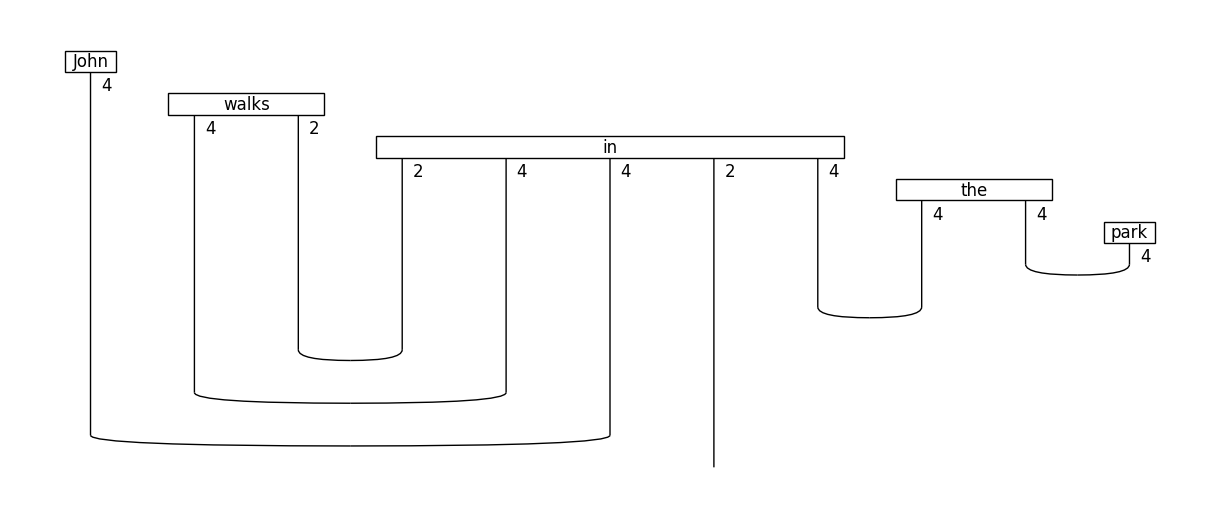

In [1]:
import warnings
warnings.filterwarnings('ignore')

from lambeq import AtomicType, BobcatParser, TensorAnsatz
from lambeq.backend.tensor import Dim

# Define atomic types
N = AtomicType.NOUN
S = AtomicType.SENTENCE

# Parse a sentence
parser = BobcatParser(verbose='suppress')
diagram = parser.sentence2diagram('John walks in the park')

# Apply a tensor ansatz
ansatz = TensorAnsatz({N: Dim(4), S: Dim(2)})
tensor_diagram = ansatz(diagram)
tensor_diagram.draw(figsize=(12,5), fontsize=12)

In [2]:
tensor_diagram.free_symbols

{John__n, in__s.r@n.r.r@n.r@s@n.l, park__n, the__n@n.l, walks__n.r@s}

Each symbol is associated with a specific size, which is defined from the applied ansatz.

In [3]:
[(s, s.size) for s in tensor_diagram.free_symbols]

[(John__n, 4),
 (the__n@n.l, 16),
 (walks__n.r@s, 8),
 (park__n, 4),
 (in__s.r@n.r.r@n.r@s@n.l, 256)]

For example, you see that preposition "in" has been assigned 256 dimensions, which is derived by multiplying the dimensions of each individual wire ($2 \cdot 4 \cdot 4 \cdot 2 \cdot 4$), nouns are assigned 4 dimensions, and the determiner 16 dimensions.

## Circuit symbols

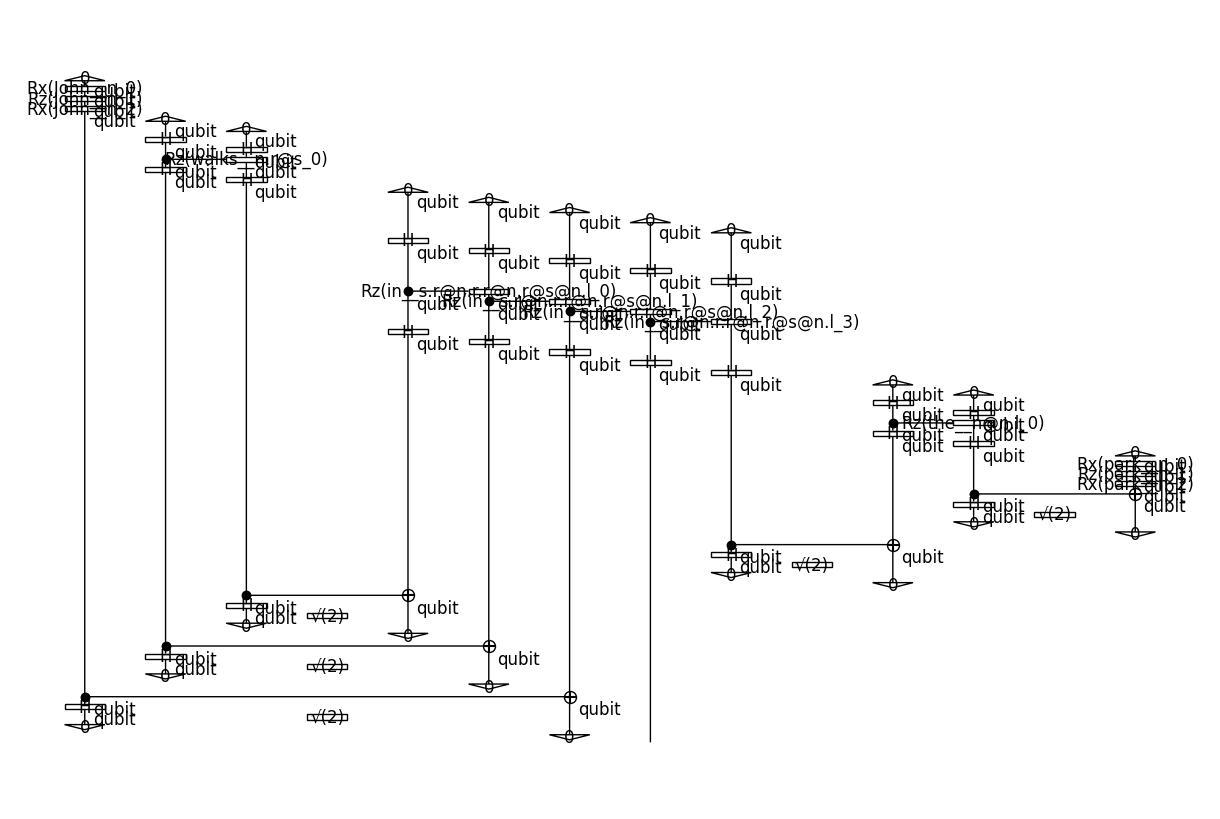

In [4]:
from lambeq import IQPAnsatz

iqp_ansatz = IQPAnsatz({N: 1, S: 1}, n_layers=1)
circuit = iqp_ansatz(diagram)
circuit.draw(figsize=(12,8), fontsize=12)

In [5]:
circuit.free_symbols

{John__n_0,
 John__n_1,
 John__n_2,
 in__s.r@n.r.r@n.r@s@n.l_0,
 in__s.r@n.r.r@n.r@s@n.l_1,
 in__s.r@n.r.r@n.r@s@n.l_2,
 in__s.r@n.r.r@n.r@s@n.l_3,
 park__n_0,
 park__n_1,
 park__n_2,
 the__n@n.l_0,
 walks__n.r@s_0}

## From symbols to tensors

In [6]:
from sympy import default_sort_key

parameters = sorted(tensor_diagram.free_symbols, key=default_sort_key)

We will use `numpy` arrays for the tensors, initialised randomly:

In [7]:
import numpy as np

tensors = [np.random.rand(p.size) for p in parameters]
print(tensors[0])

[0.39186831 0.69836431 0.09910199 0.68880022]


In [8]:
tensor_diagram_np = tensor_diagram.lambdify(*parameters)(*tensors)
print("Before lambdify:", tensor_diagram.boxes[0].data)
print("After lambdify:", tensor_diagram_np.boxes[0].data)

Before lambdify: John__n
After lambdify: [0.39186831 0.69836431 0.09910199 0.68880022]


In [9]:
result = tensor_diagram_np.eval(dtype=float)
print(result)

[16.20524402 16.54939603]


In [10]:
result

array([16.20524402, 16.54939603])